# Image Display Examples

In [1]:
from __future__ import print_function, unicode_literals, division, absolute_import

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import IPython

from widget_canvas import widget_canvas

## Load some image data

The [imageio package](https://github.com/imageio/imageio) is a great tool for reading/writing almost any kind of imagery, including video, volumetric data, and scientific formats.

In [2]:
data_image = imageio.imread('images/Whippet.jpg')

data_image.shape

(220, 320, 3)

## Matplotlib and `imshow()`

[Matplotlib](http://matplotlib.org/) is a great high-quality data display tool used by lots of people for a long time.  It has long been my first choice for interactive data exploration on my PC when I want a native GUI framework.  But when I use the IPython Notebook I want my interactive display tools to live entirely in the world of HTML and JavaScript.  Static image display works fine enough (see the example below), but fully-interactive displays are still a [work in progress](http://matplotlib.org/users/whats_new.html#webagg-backend).  Ultimately I need compatibility with IPython widgets and Matplotlib is not there yet.

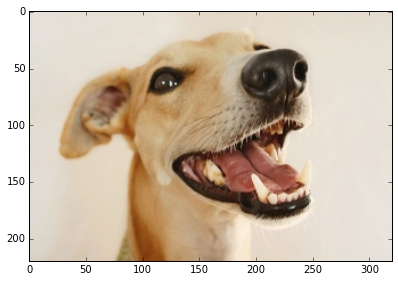

In [12]:
plt.imshow(data_image)

plt.tight_layout()

# IPython's Built-in Image Widget

The IPython built-in image widget accepts as input a string of byte data representing an already-compressed image.  The compressed image data is synchronized from the Python backend to the Notebook's Javascript frontend and copied into the widget's [image](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/img) element for display.

The upside of this display widget is simplicity of implementaion.  The downside is the depth of understanding and complexity of implementation required of the user.  I want an easy-to-use image display widget that readily accepts Numpy arrays as input.

In [15]:
# Compress the image data.
data_comp = imageio.imwrite(imageio.RETURN_BYTES, data_image, format='png')

# Display first 100 bytes of compressed data just for fun.
data_comp[:100]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00\xdc\x08\x02\x00\x00\x00\x8e!\xefq\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00 \x00IDATx\xda\xd4\xbdY\x93$\xc9q&\xa8\x87\x99\xbbGDf\x1d\xdd\xd5@\xe3&\xc0!\x81!g8\xe4\xce>PH\x19r\x84?'

In [16]:
# Built-in IPython image widget.
wid_builtin = IPython.html.widgets.Image(value=data_comp)

wid_builtin.border_color = 'black'
wid_builtin.border_width = 2

wid_builtin

## HTML Canvas Element and JavaScript

The HTML5 [Canvas Element](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/canvas) is a great tool for displaying images and drawing artwork onto a bitmap surface in the browser.  It has built-in support for mouse events plus size and rotation transforms.

The example below uses HTML and JavaScript to display an image to a canvas element.  Here I use a URL linking directly to the image in my Github repository.

In [13]:
%%html

<html>
    <head></head>
    <body>
        <canvas id='hello_example' style='border: solid black 2px'/>
    </body>
</html>

In [14]:
%%javascript

// URL to elephant image at wikipedia.com.
var url = 'https://raw.githubusercontent.com/Who8MyLunch/ipynb_widget_canvas/master/notebooks/images/Whippet.jpg'

// Get the canvas element plus corresponding drawing context
var canvas = document.getElementById('hello_example');
var context = canvas.getContext('2d');

// Create a hidden <img> element to manage incoming data.
var img = new Image();

// Add new-data event handler to the hidden <img> element.
img.onload = function () {
    // This function will be called when new image data has finished loading
    // into the <img> element.  This new data will be the source for drawing
    // onto the Canvas.

    // Set canvas geometry.
    canvas.width = img.width
    canvas.style.width = img.width + 'px'

    canvas.height = img.height
    canvas.style.height = img.height + 'px'

    // Draw new image data onto the Canvas.
    context.drawImage(img, 0, 0);
}

// Assign image URL.
img.src = url

<IPython.core.display.Javascript object>

# My New Canvas Widget

In [9]:
wid_canvas = widget_canvas.CanvasImage(data_image)

wid_canvas.border_color = 'black'
wid_canvas.border_width = 2

wid_canvas